## Here we try to predict petal length  from sepal length and  sepal width

Early stopping at epoch 54
Enter the file path to save the model: train_regression2_model


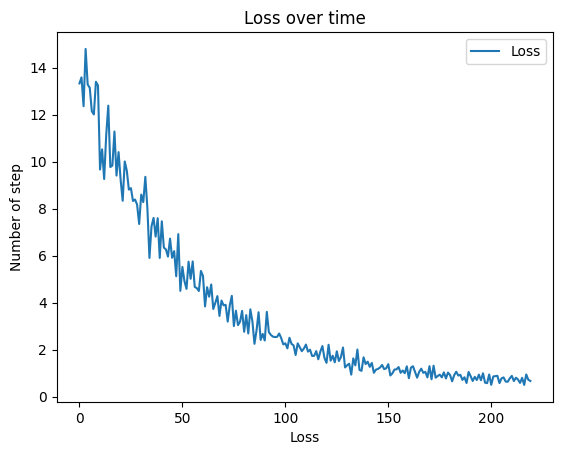

In [1]:
%matplotlib inline

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from LinearRegression import LinearRegression


# Load the datasets
iris = load_iris()

# Assign the datasets
X, y = iris.data[:,:2], iris.data[:, 2]

# Split the data into training and testing set
X_train, X_test,  y_train, y_test = train_test_split(X, y, random_state=42, train_size= 0.9)

# Performing the Standardization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Intialize the model
lin_reg = LinearRegression()

# Fitting the parameters to the model
loss_history = lin_reg.fit(X_train_scaled, y_train, regularization = 0.1)

# Making the prediction on the data
y_predict = lin_reg.predict(X_test_scaled)


# Calculating the loss score
loss_score = lin_reg.score(X_test_scaled, y_test)

# Saving the model
model = {
    'parameters': np.concatenate([lin_reg.bias.reshape(1), lin_reg.weights]),
    'X_test': X_test_scaled,
    'y_test': y_test
}

file_path = input('Enter the file path to save the model: ')
with open(file_path, 'wb') as file:
    pickle.dump(model, file)
    
# Plotting loss at each step
plt.plot(loss_history, label = 'Loss')
plt.title('Loss over time')
plt.xlabel('Loss')
plt.ylabel('Number of step')

plt.legend()
plt.show()